# Title: Loan Performance Analysis - Data Requirements

Introduction:

> As part of our ongoing commitment to strategic decision-making and risk management, we are seeking a comprehensive analysis of our loan portfolio performance. To facilitate this analysis, we are enlisting the expertise of a data analyst to extract meaningful insights from our loan data. The primary focus will be on understanding the overall loan performance, identifying patterns, and discerning trends over time and across different states.

Objective:


> The primary objective is to answer the following questions:



1. Overall Loan Performance:


> *   What is the overall performance of the loans?


> *   How many loans were paid in full (PIF)?


> *   How many loans were charged off (CHGOFF)?


2. Patterns and Trends:


> *   Are there any patterns or trends in loan performance over time or across different states?
















In [1]:
#Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#Import CSV
df = pd.read_csv('/content/SBAnational.csv')

<ipython-input-2-5e61b1ba0dab>:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/SBAnational.csv')


In [3]:
#View file
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [4]:
#Check type in column
df.dtypes

LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate          object
ApprovalFY            object
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
ChgOffDate            object
DisbursementDate      object
DisbursementGross     object
BalanceGross          object
MIS_Status            object
ChgOffPrinGr          object
GrAppv                object
SBA_Appv              object
dtype: object

# Cleaning the data:

1. Create Data Frame relevant to the questions
2. Check Null Values
3. Meaningful Column Names

In [5]:
#Gather Relevant Columns
df_copy = df[['LoanNr_ChkDgt', 'State', 'MIS_Status', 'ApprovalDate']]
df_copy.head()

,LoanNr_ChkDgt,State,MIS_Status,ApprovalDate
0,1000014003,IN,P I F,28-Feb-97
1,1000024006,IN,P I F,28-Feb-97
2,1000034009,IN,P I F,28-Feb-97
3,1000044001,OK,P I F,28-Feb-97
4,1000054004,FL,P I F,28-Feb-97


In [6]:
#Check Null Values
df_copy.isna().sum()

LoanNr_ChkDgt       0
State              14
MIS_Status       1997
ApprovalDate        0
dtype: int64

In [7]:
#Check Percentage for missing Data
State_Percentage_Null = df_copy['State'].isnull().mean() * 100
print('The Percentage of Null values for State = ' + str(State_Percentage_Null))
MIS_Status_Percentage_Null = df_copy['MIS_Status'].isnull().mean()*100
print('The Percentage of Null values for MIS Status = ' + str(MIS_Status_Percentage_Null))

The Percentage of Null values for State = 0.001557001837262168
The Percentage of Null values for MIS Status = 0.22209519064375355


In [8]:
#Remove the null values --> Data is large so still have enough data to work with
df_copy.dropna(inplace=True)

<ipython-input-8-1f7ef39ccfc8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy.dropna(inplace=True)


In [9]:
#Check the null values are removed
df_copy.isna().sum()

LoanNr_ChkDgt    0
State            0
MIS_Status       0
ApprovalDate     0
dtype: int64

In [10]:
#Fix column names
rename_columns = {
    'LoanNr_ChkDgt': 'Loan_ID',
    'MIS_Status': 'Loan_Status',
    'ApprovalDate': 'Loan_Year',
}

df_copy.rename(columns=rename_columns, inplace=True)

<ipython-input-10-28a2e6123222>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy.rename(columns=rename_columns, inplace=True)


In [11]:
#Check the renamed columns
df_copy.head()

,Loan_ID,State,Loan_Status,Loan_Year
0,1000014003,IN,P I F,28-Feb-97
1,1000024006,IN,P I F,28-Feb-97
2,1000034009,IN,P I F,28-Feb-97
3,1000044001,OK,P I F,28-Feb-97
4,1000054004,FL,P I F,28-Feb-97


In [12]:
#Change date to year
df_copy['Loan_Year'] = pd.to_datetime(df_copy['Loan_Year'], errors='coerce') #Convert to datetime
df_copy['Loan_Year'] = df_copy['Loan_Year'].dt.year
df_copy.head()

<ipython-input-12-acb10f1e143d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Loan_Year'] = pd.to_datetime(df_copy['Loan_Year'], errors='coerce') #Convert to datetime
<ipython-input-12-acb10f1e143d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Loan_Year'] = df_copy['Loan_Year'].dt.year


,Loan_ID,State,Loan_Status,Loan_Year
0,1000014003,IN,P I F,1997
1,1000024006,IN,P I F,1997
2,1000034009,IN,P I F,1997
3,1000044001,OK,P I F,1997
4,1000054004,FL,P I F,1997


In [13]:
#Get the counts for each Status
performance_count = df_copy['Loan_Status'].value_counts()
print(str(performance_count))

P I F     739598
CHGOFF    157556
Name: Loan_Status, dtype: int64


In [14]:
#Check for different Years in the column
df_copy['Loan_Year'].unique()

array([1997, 1980, 2006, 1996, 1998, 1999, 2000, 2001, 2071, 2002, 2003,
       2004, 2072, 1978, 1981, 2005, 1979, 1982, 1983, 1984, 1985, 2007,
       1986, 1987, 1973, 2008, 1988, 1989, 2009, 1991, 1990, 2010, 2011,
       1992, 1993, 2012, 1994, 2013, 1975, 1976, 1974, 2014, 1977, 2068,
       2069, 2070, 1995])

In [15]:
#Check the count of each year
year_2068_sum = (df_copy['Loan_Year'] == 2068).sum()
print('The total rows equal to year 2068 is ' + str(year_2068_sum))
year_2069_sum = (df_copy['Loan_Year'] == 2069).sum()
print('The total rows equal to year 2069 is ' + str(year_2069_sum))
year_2070_sum = (df_copy['Loan_Year'] == 2070).sum()
print('The total rows equal to year 2070 is ' + str(year_2070_sum))

The total rows equal to year 2068 is 3
The total rows equal to year 2069 is 3
The total rows equal to year 2070 is 18


In [32]:
#Remove the years
removed_years = [2068,2069,2070,2071,2072]
excluded_years = ~df_copy['Loan_Year'].isin(removed_years)
df_copy= df_copy[excluded_years]
df_copy['Loan_Year'].unique()

array([1997, 1980, 2006, 1996, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       1978, 1981, 2005, 1979, 1982, 1983, 1984, 1985, 2007, 1986, 1987,
       1973, 2008, 1988, 1989, 2009, 1991, 1990, 2010, 2011, 1992, 1993,
       2012, 1994, 2013, 1975, 1976, 1974, 2014, 1977, 1995])

In [33]:
# 1st Group the data
# 2nd Group size "Counts the occurances"
# 3rd Unstack the results "Like a pivot table"
year_trends = df_copy.groupby(['Loan_Year', 'Loan_Status']).size().unstack()
print(year_trends)

Loan_Status   CHGOFF    P I F
Loan_Year                    
1973            43.0      1.0
1974            29.0      3.0
1975            47.0      1.0
1976            80.0      7.0
1977           129.0     11.0
1978           258.0     10.0
1979           339.0     17.0
1980           525.0     21.0
1981           340.0    238.0
1982           345.0    507.0
1983           576.0   1269.0
1984           738.0   1252.0
1985           833.0   1146.0
1986           898.0   1300.0
1987           945.0   1193.0
1988           934.0   3397.0
1989           838.0  12728.0
1990           597.0  14402.0
1991           433.0  16046.0
1992           429.0  20682.0
1993           490.0  24536.0
1994           863.0  36144.0
1995          1261.0  40511.0
1996          1803.0  38958.0
1997          2444.0  35275.0
1998          3124.0  32649.0
1999          3855.0  33823.0
2000          4304.0  32463.0
2001          4468.0  33856.0
2002          5863.0  41512.0
2003          9543.0  52539.0
2004      

In [34]:
# 1st Group the data
# 2nd Group size "Counts the occurances"
# 3rd Unstack the results "Like a pivot table"
state_trends = df_copy.groupby(['State', 'Loan_Status']).size().unstack()
print(state_trends)

Loan_Status  CHGOFF   P I F
State                      
AK              280    2122
AL             1389    6971
AR             1064    5269
AZ             3657   13967
CA            24151  106328
CO             3668   16927
CT             1701   10424
DC              387    1226
DE              394    1799
FL            11272   29918
GA             5337   16935
HI              550    3056
IA             1382   10604
ID             1338    8158
IL             6701   22885
IN             2481   11597
KS             1497    9957
KY             1496    6223
LA             1730    7840
MA             3254   21835
MD             2614   10645
ME              583    5354
MI             4608   15881
MN             2849   21510
MO             3149   17500
MS             1217    6450
MT              593    8143
NC             2755   11531
ND              402    4835
NE              725    5655
NH             1289   10734
NJ             4828   19180
NM              658    5368
NV             1863 

# Visualization

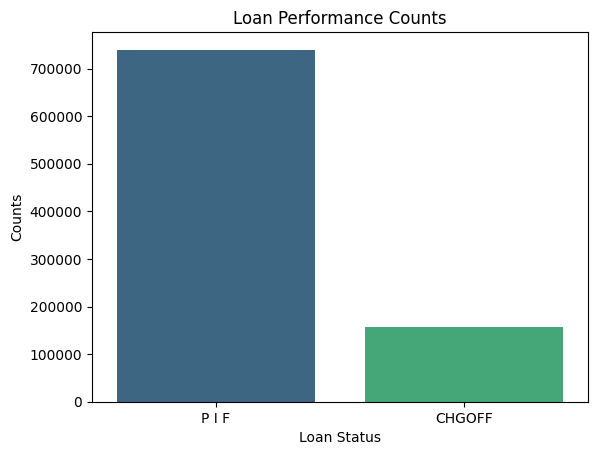

In [45]:
#Display the loan status amount
sns.countplot(x='Loan_Status', data = df_copy, palette="viridis")
plt.title("Loan Performance Counts")
plt.xlabel("Loan Status")
plt.ylabel("Counts")
plt.show()


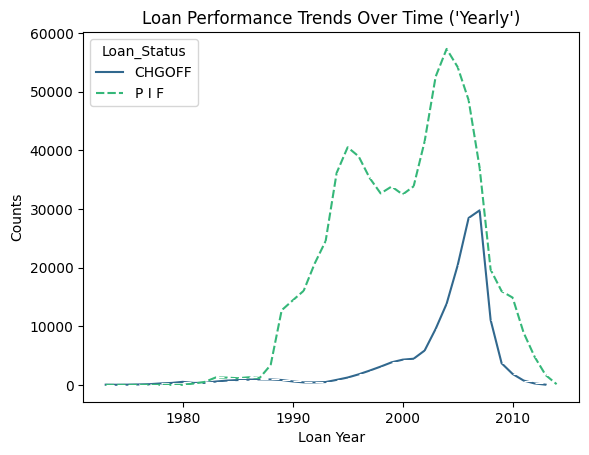

In [44]:
#Display trends over years
sns.lineplot(data=year_trends, marker=True, palette='viridis')
plt.title("Loan Performance Trends Over Time ('Yearly')")
plt.xlabel("Loan Year")
plt.ylabel("Counts")
plt.show()

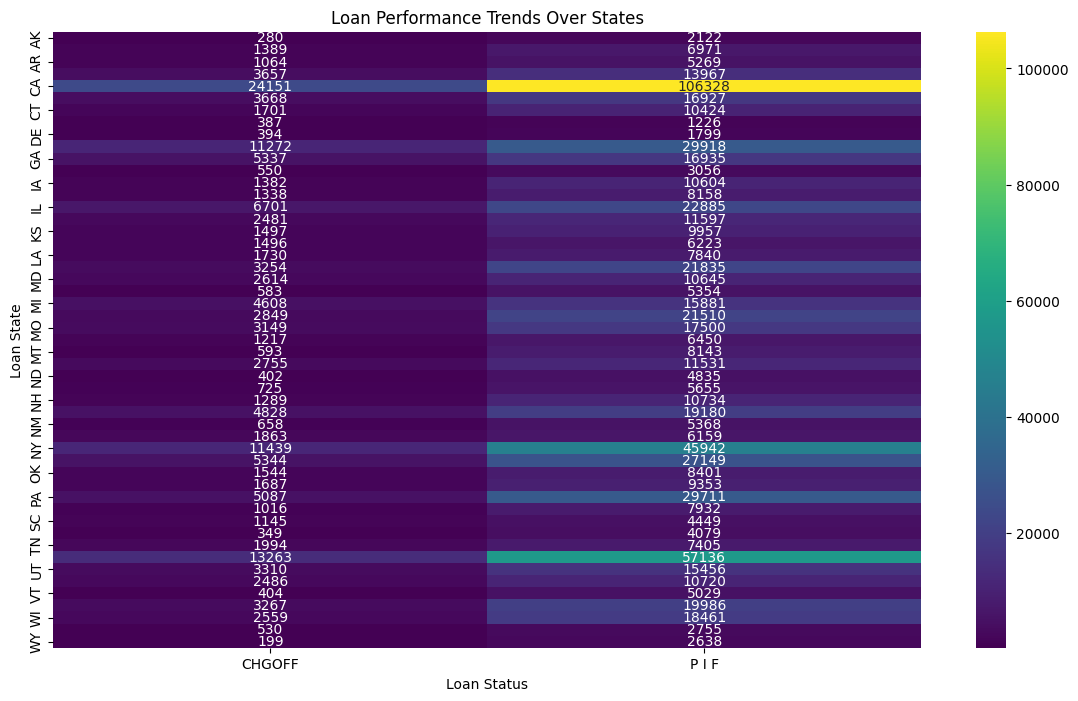

In [43]:
#Display the correlation
plt.figure(figsize=(14, 8))
sns.heatmap(state_trends, annot=True, cmap="viridis", fmt="d")
plt.title("Loan Performance Trends Over States")
plt.xlabel("Loan Status")
plt.ylabel("Loan State")
plt.show()


# Key Findings:

**Loan Performance Counts**

The distribution of loan performance indicates that **739598** loans were marked as "Paid in Full (P I F)" and **157556** loans were marked as "Charged Off (CHGOFF)."

**Loan Performance Trends Over Time**

A time-based analysis reveals fluctuations in loan performance over the years. Notable points include:


> [2004]: [Count of P I F loans: 57275.0], [Count of CHGOFF loans: 13844.0]

> [2005]: [Count of P I F loans: 54197.0], [Count of CHGOFF loans: 20365.0]


**Loan Performance Trends Across States**

Analyzing loan performance across states provides insights into variations in loan outcomes. Key observations include:


> [State - CA]: [Count of P I F loans: 106328], [Count of CHGOFF loans: 24151]

> [State - TX]: [Count of P I F loans: 57136], [Count of CHGOFF loans: 13263]






                        